# Objective: Analyze the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to:
- Understand and apply linear regression
- Introduce and identify overfitting
- Implement Ridge regularization
- Implement Cross Validation 

# Submission:
- Submit your Python code & visulaization (if any) as either jupyternotebook or a pdf file.
- Use comments in your code to explain your steps.


# Import necessary modules

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a dataframe

In [4]:
# Loading the data from the sklearn.datasets module and use all features in the model.
# Code goes here
cal = fetch_california_housing()
cal.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X = cal.data
y = cal.target

housing = pd.DataFrame(X, columns=cal.feature_names)
housing['Med_house_value'] = cal.target
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Text(0.5, 1.0, 'This is the distribution of the houses in California')

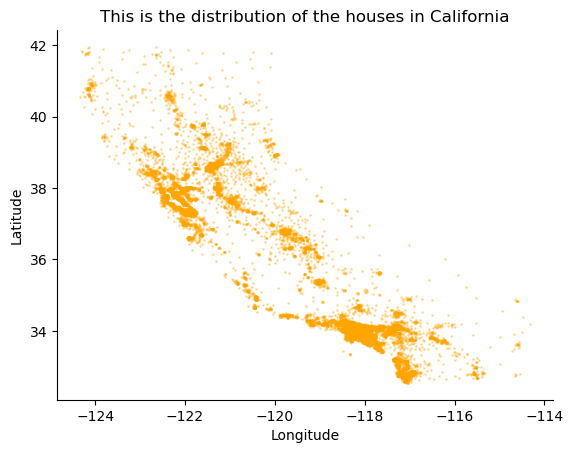

In [7]:
from matplotlib.pylab import plt
import seaborn as sns
housing.plot(x = 'Longitude', y = 'Latitude', kind = 'scatter', s = 1, color = 'orange', alpha=0.3)
sns.despine()
plt.title('This is the distribution of the houses in California')

<Axes: xlabel='Longitude', ylabel='Latitude'>

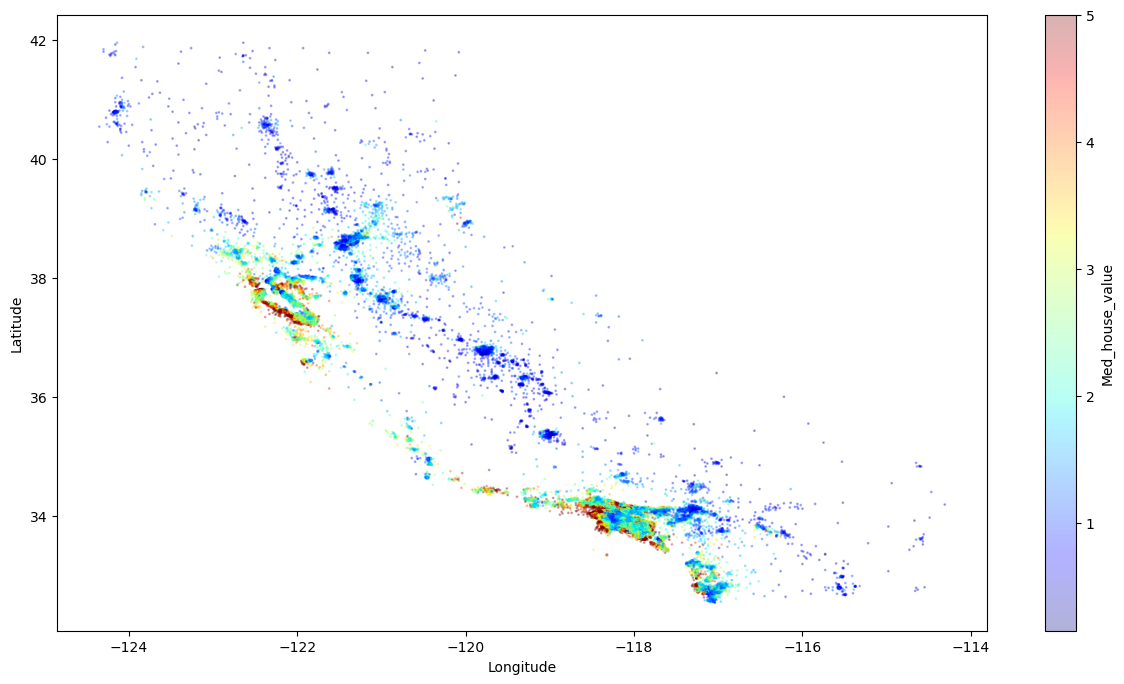

In [8]:
plt.figure(figsize=(15,8))
housing.plot(x = 'Longitude', y = 'Latitude', kind = 'scatter', s = 1, alpha=0.3, 
             c = 'Med_house_value',cmap = plt.get_cmap('jet'), ax = plt.gca())

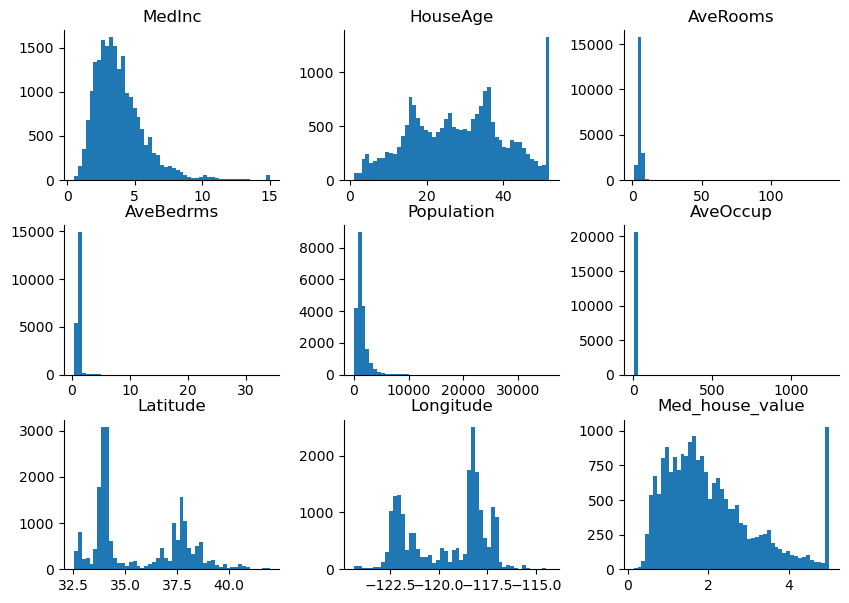

In [9]:
ax = housing.hist(bins=50, figsize=(10,7))

for a in ax.flat:
    a.grid(False)

sns.despine()

In [10]:
# Calculate the correlations between the different columns
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Med_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

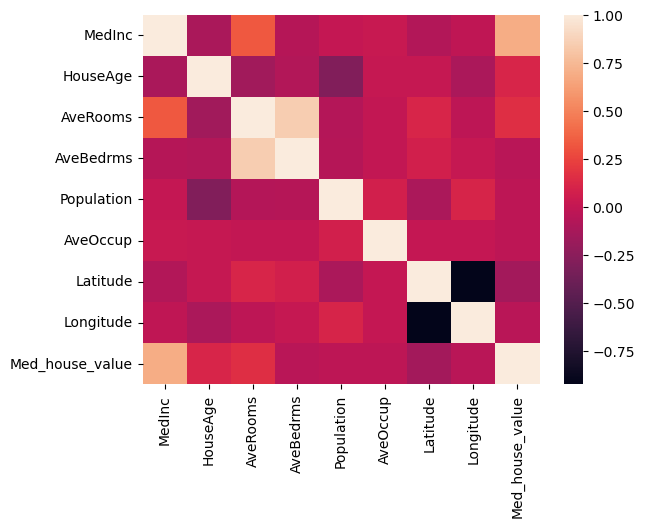

In [11]:
sns.heatmap(housing.corr())

In [12]:
corr = housing.corr()
corr['Med_house_value'].sort_values(ascending=False)

Med_house_value    1.000000
MedInc             0.688075
AveRooms           0.151948
HouseAge           0.105623
AveOccup          -0.023737
Population        -0.024650
Longitude         -0.045967
AveBedrms         -0.046701
Latitude          -0.144160
Name: Med_house_value, dtype: float64

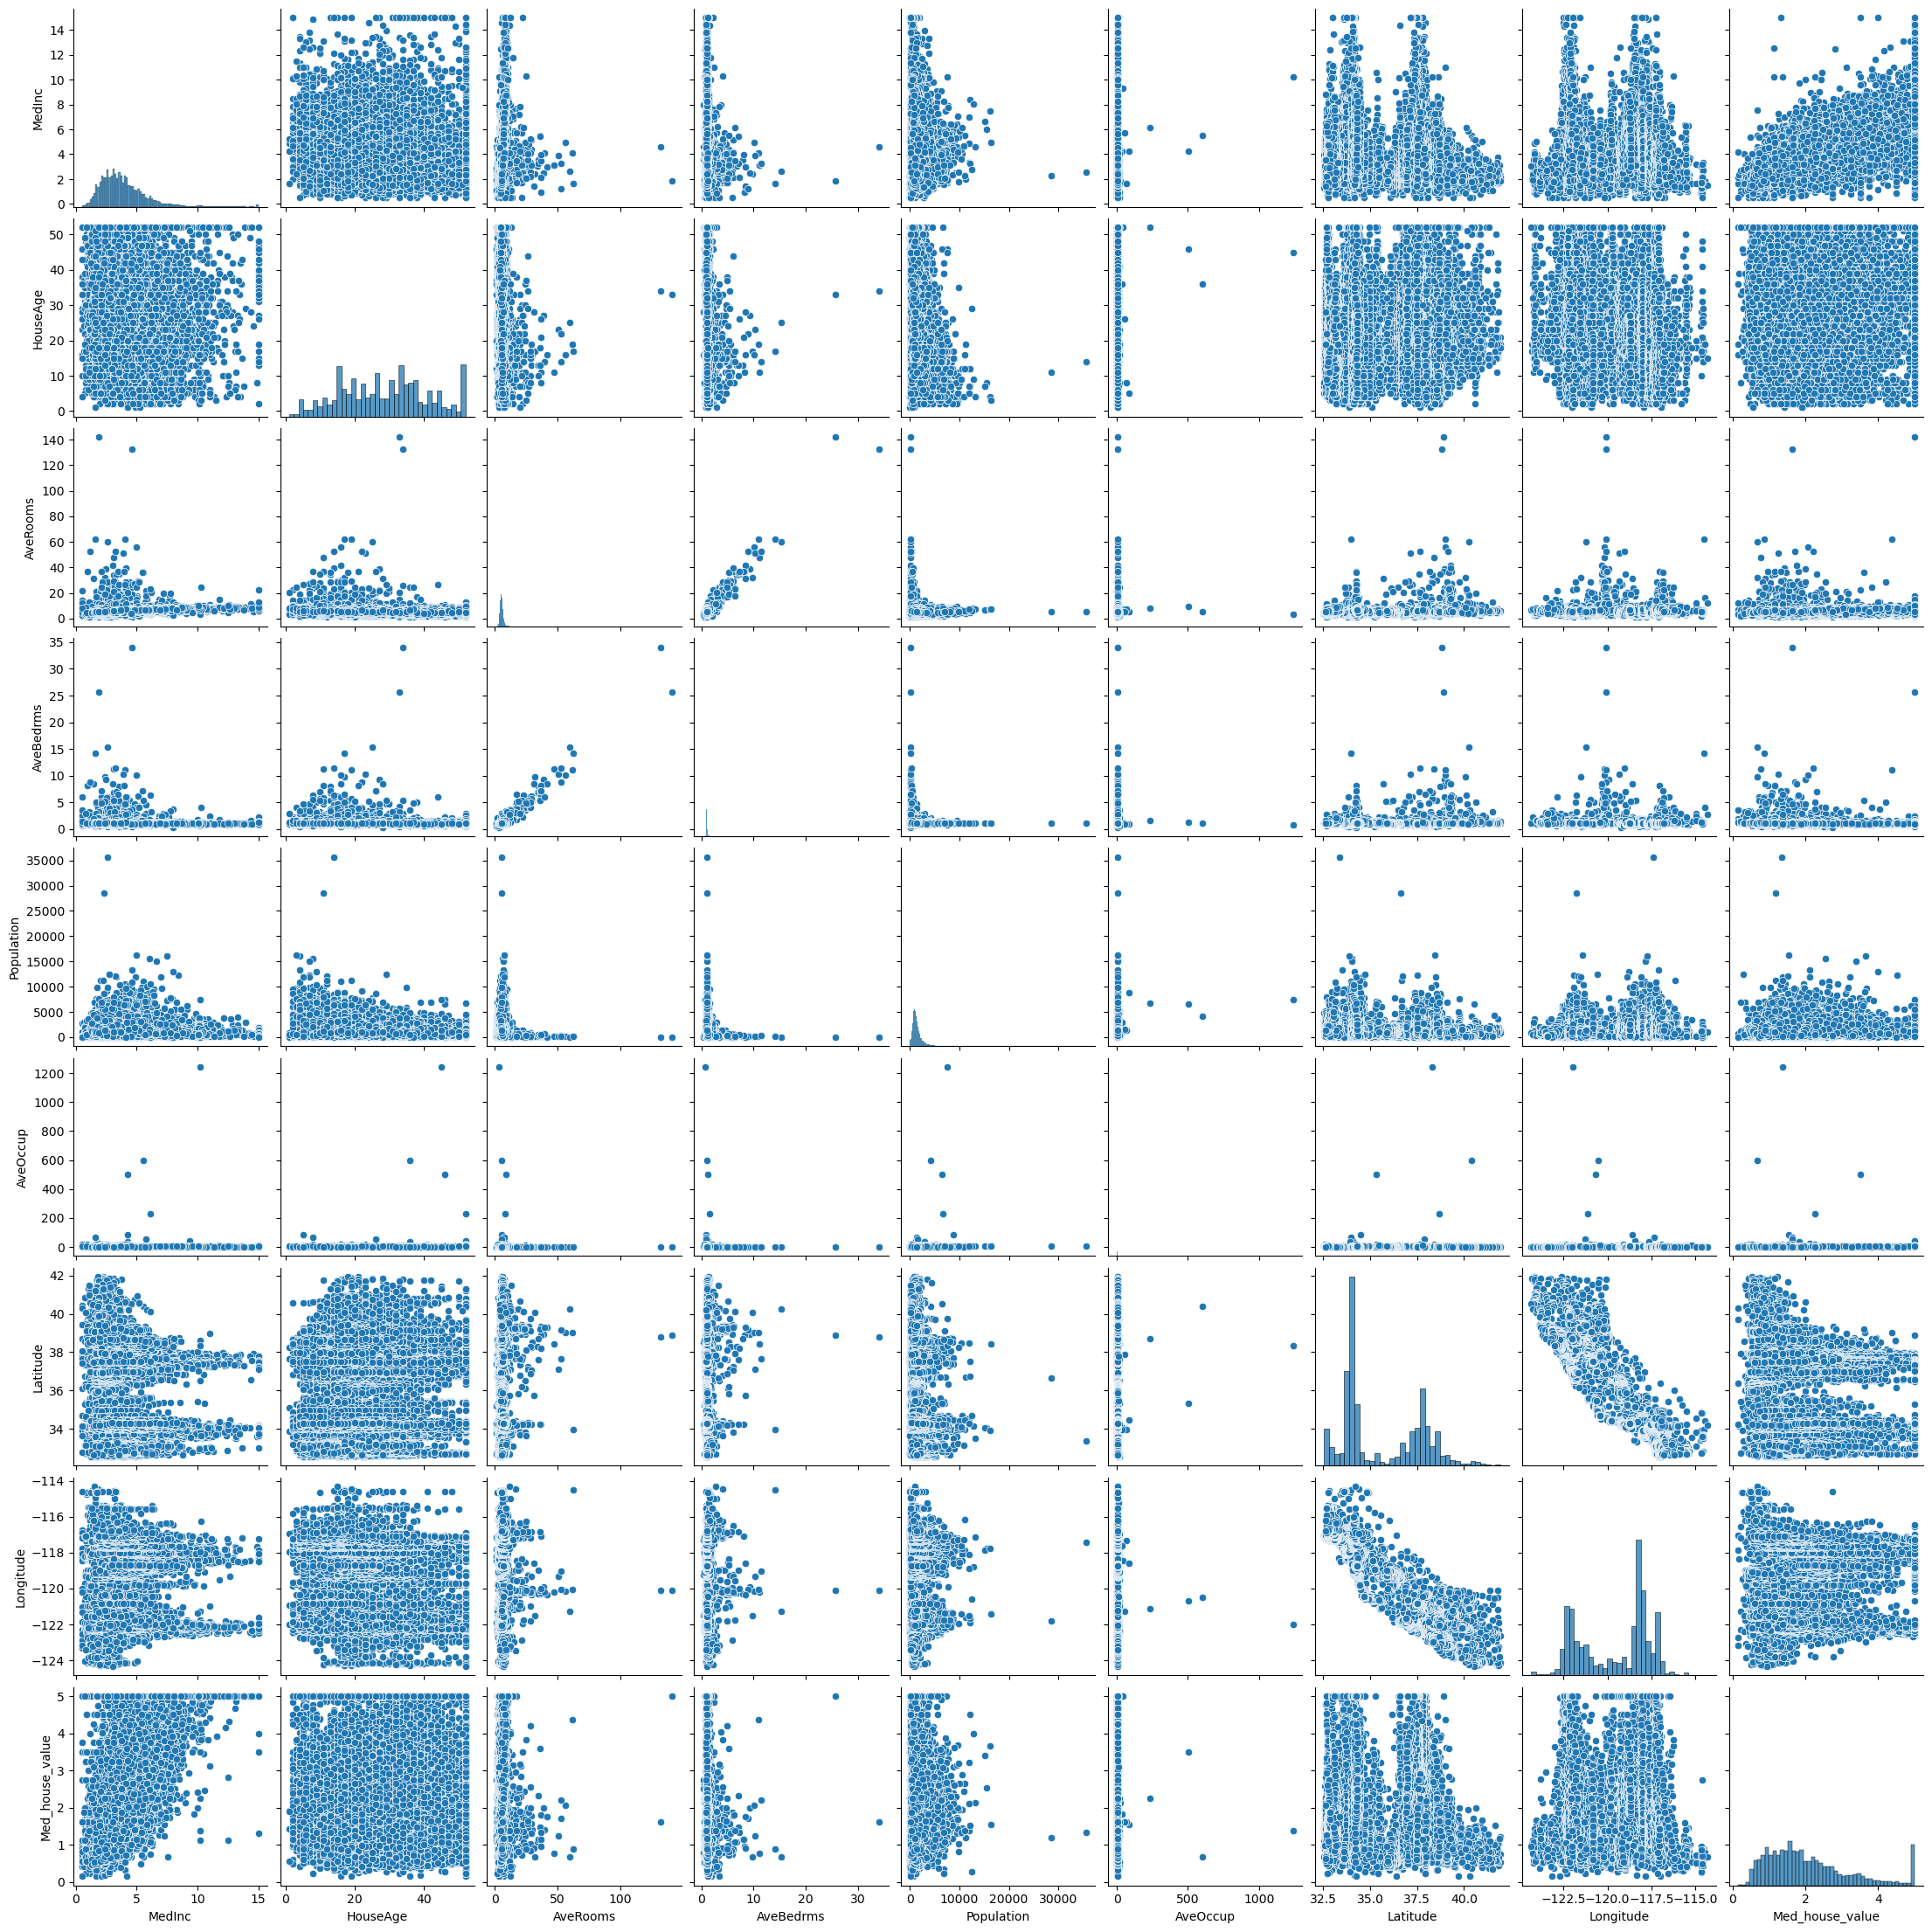

In [13]:
sns.pairplot(housing)

In [14]:
# check if we have missing data in the rows?
allrows = housing.shape[0]
non_na = housing.dropna().shape[0]
"No rows in NA" if allrows == non_na else "There are rows wuth NA"

'No rows in NA'

In [15]:
#categorical variables
housing.dtypes

MedInc             float64
HouseAge           float64
AveRooms           float64
AveBedrms          float64
Population         float64
AveOccup           float64
Latitude           float64
Longitude          float64
Med_house_value    float64
dtype: object

In [16]:
# let's introduce categorical column and see how can we turn that into numerical values
df2 = housing.copy(deep=True)
df2['color'] = np.random.choice(a = ['lightblue', 'white', 'offwhite'], size=df2.shape[0],
                               replace = True)
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_value,color
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,offwhite
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,white
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,lightblue
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,offwhite
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,offwhite


In [17]:
pd.get_dummies(df2,drop_first=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_value,color_offwhite,color_white
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False,True
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,True,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,True,False
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,True,False
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,False,True
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,False,False


# Linear Regression Model 
    - Create and train a Linear Regression model that predicts the "MedHouseVal"
    - Calculate the MSE & R2 for both the training and testing datasets.
    - How do you compare the performance of the model between the training and testing datasets?

In [18]:
#apply linear regression
X = housing.drop('Med_house_value',axis=1)
#X = housing.drop(columns='Med_house_value')
y = housing.Med_house_value
display(X.head(2), y.head(2))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


0    4.526
1    3.585
Name: Med_house_value, dtype: float64

In [19]:
X.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


In [20]:
#split data in training and test set
from sklearn.model_selection import train_test_split
X = housing.drop(columns='Med_house_value')
y = housing.Med_house_value
#shuffle data and make datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [21]:
#build the linear model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
lm.coef_

array([ 4.39988248e-01,  9.15770358e-03, -1.11827735e-01,  6.47857908e-01,
       -6.55068105e-06, -3.92330215e-03, -4.17033805e-01, -4.27676550e-01])

In [23]:
lm.intercept_

-36.25561939898531

In [24]:
yhat = lm.predict(X_test)
compare = pd.DataFrame({'yvalue':y_test,'yhat':yhat})
compare = compare.round(2)
compare['delta'] = compare.yhat - compare.yvalue
compare.reset_index(inplace=True, drop=True)
compare

,yvalue,yhat,delta
0,1.52,2.38,0.86
1,0.99,1.44,0.45
2,1.34,2.04,0.70
3,2.32,1.61,-0.71
4,4.63,2.66,-1.97
...,...,...,...
4123,1.01,1.97,0.96
4124,1.59,1.53,-0.06
4125,0.66,0.97,0.31
4126,2.17,1.72,-0.45


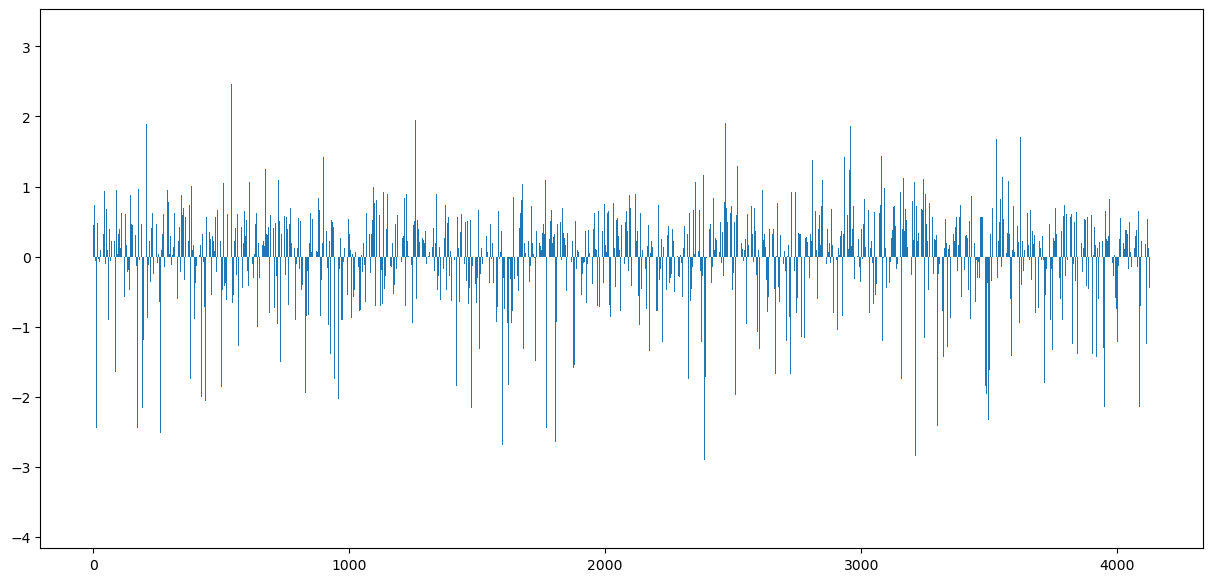

In [25]:
#let's take a look at the residual (delta) values
fig, ax = plt.subplots(1,1, figsize=(15,7))
ax = plt.bar(x = compare.index, height= compare.delta)

In [26]:
lm.score(X_train, y_train)

0.6050600797578819

In [27]:
lm.score(X_test, y_test)

0.6104546894797876

In [28]:
!pip install statsmodels

In [29]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
y = y_train
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Med_house_value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3160.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:31:36   Log-Likelihood:                -18126.
No. Observations:               16512   AIC:                         3.627e+04
Df Residuals:                   16503   BIC:                         3.634e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2556      0.740    -49.012      0.000     -37.706     -34.806
MedInc         0.4400      0.005     92.841      0.000       0.431       0.449
HouseAge       0.0092      0.001     18.276      0.000       0.008       0.010
AveRooms      -0.1118      0.007    -16.825      0.000      -0.125      -0.099
AveBedrms      0.6479      0.031     20.670      0.000       0.586       0.709
Population -6.551e-06   5.34e-06     -1.226      0.220    -1.7e-05    3.92e-06
AveOccup      -0.0039      0.001     -7.351      0.000      -0.005      -0.003
Latitude      -0.4170      0.008    -51.651      0.000      -0.433      -0.401
Longitude     -0.4277      0.008    -50.565      0.000      -0.444      -0.411
==============================================================================
Omnibus:                     3503.280   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11428.927
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       6.466   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.MedInc.values.reshape(-1,1), y, test_size=0.2,
                                                    random_state=123)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [31]:
lm2.score(X_train, y_train)

0.4763456223520667

In [32]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard deviation", scores.std())

In [33]:
from sklearn.metrics import mean_squared_error
housing_predictions = lm2.predict(X_train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8394163298913484

In [56]:
display_scores(lin_rmse)

Scores 0.8394163298913484
Mean 0.8394163298913484
Standard deviation 0.0


# Overfitting
- Read about the [PolynomialFeatures in sklearn]([https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html]). 
- For example PolynomialFeatures(degree=2) for the features(x1, & x2) will create all of the following:\n
    - 1, x1, x2, x1^2, x1*x2, and x2^2
- For the purpose of this exercise, let's apply: polynom = PolynomialFeatures(degree=2)
- Let's change the data as follows (assuming X_train is already defined): 
        - X_train_polynom = polynom.fit_transform(X_train)
        - X_test_polynom  = polynom.transform(X_test)
- Now, conduct Linear Regression for the transformed data (e.g. X_train_polynom, X_test_polynom)
- What do we learn? Do we see a clear sign of overfitting?

In [40]:
from sklearn.preprocessing import PolynomialFeatures

# Code goes here
polynom = PolynomialFeatures(degree=2,include_bias=False)
X_train_polynom = polynom.fit_transform(X_train)
X_test_polynom = polynom.transform(X_test)

In [41]:
X_train

array([[10.3798],
       [ 2.8289],
       [ 4.2743],
       ...,
       [ 2.0893],
       [ 4.8906],
       [ 3.5364]])

In [42]:
X_train_polynom

array([[ 10.3798    , 107.74024804],
       [  2.8289    ,   8.00267521],
       [  4.2743    ,  18.26964049],
       ...,
       [  2.0893    ,   4.36517449],
       [  4.8906    ,  23.91796836],
       [  3.5364    ,  12.50612496]])

In [43]:
X_test

array([[3.2833],
       [3.4333],
       [3.371 ],
       ...,
       [4.2153],
       [5.521 ],
       [3.9205]])

In [45]:
X_test_polynom

array([[ 3.2833    , 10.78005889],
       [ 3.4333    , 11.78754889],
       [ 3.371     , 11.363641  ],
       ...,
       [ 4.2153    , 17.76875409],
       [ 5.521     , 30.481441  ],
       [ 3.9205    , 15.37032025]])

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_polynom, y_train)
lin_reg.intercept_, lin_reg.coef_

(0.21987754920881053, array([ 0.52602219, -0.0099064 ]))

# Ridge Regularization
    - Conduct Ridge Linear Regression to the data from the previous section.
    - What is the preferred regression model here and why? (Linear Regression or Ridge?)

In [50]:
from sklearn.linear_model import Ridge
# Code goes here...
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X_train,y_train)
ridge_reg.predict([[1.5]])

array([1.08042769])

# Ridge Hyperparameter Tuning
    - Given the 4 alpha values (alphas = [0.1, 1.0, 10.0, 100.0]).
    - Apply Cross validation to evaluate the performance of the Ridge model with the above alpha-values.
    - What is your preferred value?
    - Hint: use the sklearn cross_val_score 


In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Code goes here
scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [63]:
display_scores(rmse_scores)

Scores [0.81936634 0.83930143 0.86267063 0.8552269  0.83678442 0.87360883
 0.83243324 0.81328363 0.8144642  0.84621153]
Mean 0.8393351162545171
Standard deviation 0.019414438811649747


In [64]:
lin_scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores [0.81936634 0.83930143 0.86267063 0.8552269  0.83678442 0.87360883
 0.83243324 0.81328363 0.8144642  0.84621153]
Mean 0.8393351162545171
Standard deviation 0.019414438811649747
